In [1]:
import pandas as pd
import os

In [2]:
# Correcting relative path by going one level up
file_path = os.path.join(os.getcwd(), "..", "DataSet", "healthinsurance.csv")

# Normalize path (useful for cross-platform compatibility)
file_path = os.path.normpath(file_path)

# Check if file exists
if os.path.exists(file_path):
    print("File found")
    df = pd.read_csv(file_path)
else:
    print("File not found!")


File found


In [3]:
#display sample of 15
df.sample(15)

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
11984,23.0,male,54,29.4,NoDisease,0,1,Lovelock,79,1,1,Doctor,21978.2
47,38.0,female,79,40.2,NoDisease,0,0,Indianapolis,68,1,0,FashionDesigner,5401.0
234,49.0,male,59,26.1,NoDisease,0,1,Pheonix,73,0,0,Actor,13571.0
12944,35.0,male,84,39.7,NoDisease,4,0,Lovelock,70,1,0,Actor,19496.7
9312,56.0,male,56,20.0,NoDisease,0,1,Charlotte,50,0,0,FilmMaker,22412.7
9768,NaN,female,71,18.3,NoDisease,5,1,Columbus,74,1,1,FilmMaker,19023.3
11015,51.0,female,67,35.0,NoDisease,2,1,Brookings,86,1,0,FilmDirector,44641.2
1480,22.0,male,54,52.6,HeartDisease,1,1,Chicago,62,1,0,Photographer,44501.4
7577,NaN,female,70,34.3,NoDisease,5,0,Fargo,82,1,0,Analyst,8596.8
5036,21.0,female,50,17.4,NoDisease,1,0,NewYork,56,1,0,HomeMakers,2585.3


In [4]:
#get data types
print(df.dtypes)

# for each float give me the range of values
print(df.describe())




age                    float64
sex                     object
weight                   int64
bmi                    float64
hereditary_diseases     object
no_of_dependents         int64
smoker                   int64
city                    object
bloodpressure            int64
diabetes                 int64
regular_ex               int64
job_title               object
claim                  float64
dtype: object
                age        weight           bmi  no_of_dependents  \
count  14604.000000  15000.000000  14044.000000      15000.000000   
mean      39.547521     64.909600     30.266413          1.129733   
std       14.015966     13.701935      6.122950          1.228469   
min       18.000000     34.000000     16.000000          0.000000   
25%       27.000000     54.000000     25.700000          0.000000   
50%       40.000000     63.000000     29.400000          1.000000   
75%       52.000000     76.000000     34.400000          2.000000   
max       64.000000     95.0000

In [5]:
# Amount of rows with missing data
missing_data = df.isnull().sum()

print(missing_data)

# Drop rows with missing data
df = df.dropna()

age                    396
sex                      0
weight                   0
bmi                    956
hereditary_diseases      0
no_of_dependents         0
smoker                   0
city                     0
bloodpressure            0
diabetes                 0
regular_ex               0
job_title                0
claim                    0
dtype: int64


In [6]:
# create sub dataset without hereditary_diseases, city and job_title
df2 = df.drop(columns=['hereditary_diseases', 'city', 'job_title'])

# print every binary column:
for column in df2.columns:
    if df2[column].nunique() == 2:
        print(column) 

#Convert sex to binary
df2['sex'] = df2['sex'].astype('category').cat.codes

print(df.sample(2))
print(df2.sample(2))




sex
smoker
diabetes
regular_ex
        age   sex  weight   bmi hereditary_diseases  no_of_dependents  smoker  \
10527  34.0  male      55  29.9           NoDisease                 2       0   
9568   42.0  male      69  26.9           NoDisease                 0       0   

            city  bloodpressure  diabetes  regular_ex   job_title    claim  
10527  Cleveland             74         0           1  Technician  23051.2  
9568   Charlotte             74         1           0      Police   5969.7  
        age  sex  weight   bmi  no_of_dependents  smoker  bloodpressure  \
10464  26.0    0      51  40.2                 0       0             90   
1400   55.0    1      76  37.3                 0       0             66   

       diabetes  regular_ex    claim  
10464         1           1   3201.3  
1400          1           1  20630.3  


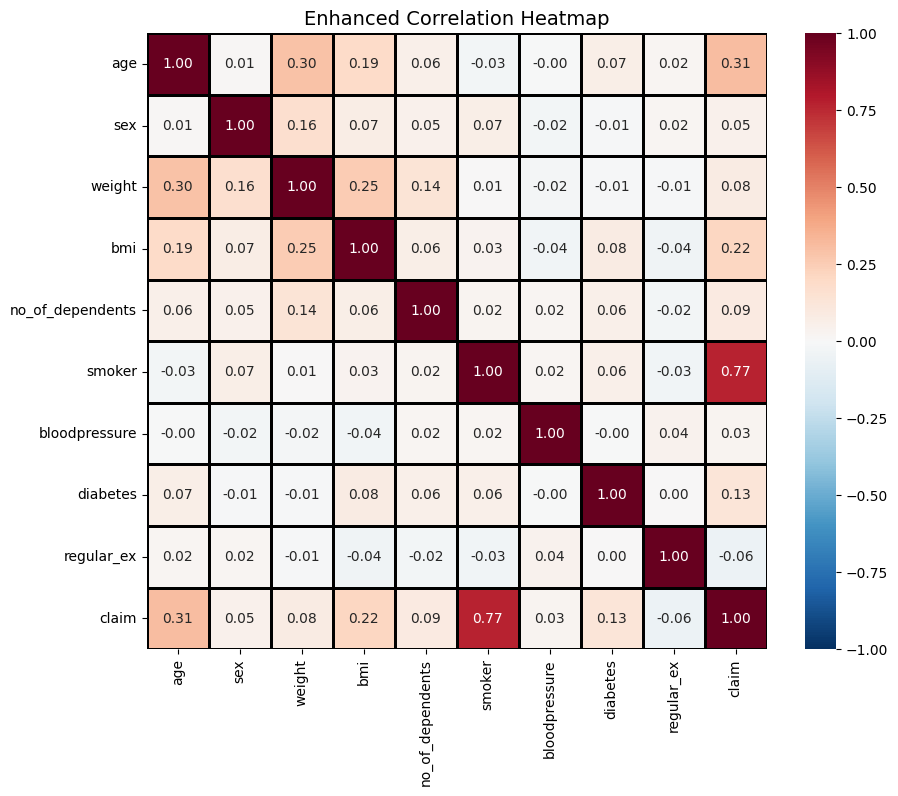

In [7]:
# display correlation plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))  # Increase figure size
sns.heatmap(
    df2.corr(),
    annot=True, 
    fmt=".2f",  # Limit decimal places
    cmap="RdBu_r",  # Diverging colormap for better contrast
    center=0, 
    linewidths=1,  # Add grid lines
    linecolor="black",  # Grid color
    vmin=-1, vmax=1,  # Fixed scale for consistency
    annot_kws={"size": 10}  # Increase annotation font size
)
plt.title("Enhanced Correlation Heatmap", fontsize=14)  # Add title
plt.show()


In [8]:
# Real Life Comparison: Is the data set balanced?
print(df2.mean())

#get weight for man and weight female
print(df.groupby('sex')['weight'].mean())


age                    39.586533
sex                     0.487104
weight                 64.689478
bmi                    30.287295
no_of_dependents        1.106462
smoker                  0.198124
bloodpressure          68.628737
diabetes                0.783118
regular_ex              0.223110
claim               13416.465050
dtype: float64
sex
female    62.506143
male      66.988418
Name: weight, dtype: float64


## Real Life Comparison: 

### Cont. Variables:
Age: 38.6 

Weight Male: 89.7 kg

Weight Female: 77.4 kg 

BMI: 29 

Bloodpressure: 70-80 

claim: 14,570

### Cat. Variables
Sex: 50.5% male 

Smoker: 11.6% 

Diabetes: 11.6%

Reg. exercise: 24.2%




In [17]:
df_diabetes = df2[df2['diabetes'] == 1]
df_non_diabetes = df2[df2['diabetes'] == 0]

# Define the total number of samples for bootstrapping
n_samples = len(8*df2)  # You can change this to any desired number
print(n_samples)

# Calculate the required count for diabetes (11.6% of total)
n_diabetes = int(n_samples * 0.116)
n_non_diabetes = n_samples - n_diabetes  # Remaining samples are non-diabetes

# Bootstrap samples with replacement
df_diabetes_sample = df_diabetes.sample(n=n_diabetes, replace=True, random_state=42)
df_non_diabetes_sample = df_non_diabetes.sample(n=n_non_diabetes, replace=True, random_state=42)

# Combine the sampled data
df_bootstrapped = pd.concat([df_diabetes_sample, df_non_diabetes_sample])

# Shuffle the data to remove any order bias
df_bootstrapped = df_bootstrapped.sample(frac=1, random_state=42).reset_index(drop=True)

# Print the mean of the bootstrapped dataset
print(df_bootstrapped.mean())

#save to csv
df_bootstrapped.to_csv('bootstrapped_healthinsurance.csv', index=False)


13648
age                    38.053927
sex                     0.496336
weight                 64.909144
bmi                    29.497179
no_of_dependents        1.010331
smoker                  0.160243
bloodpressure          68.875000
diabetes                0.115988
regular_ex              0.221131
claim               10733.832334
dtype: float64


<Axes: >

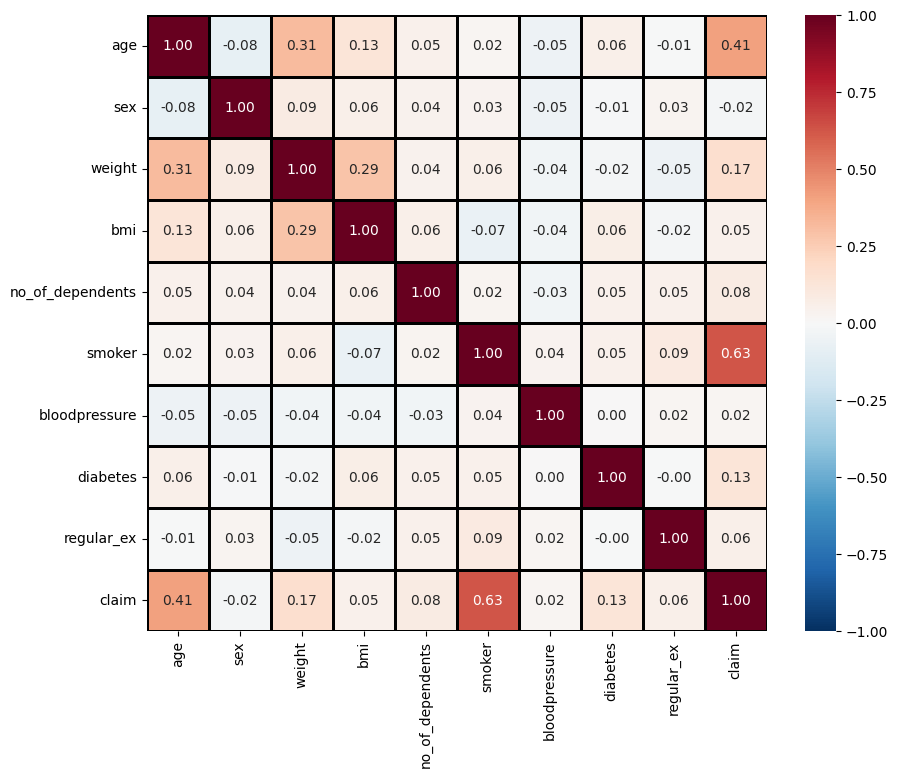

In [18]:
# correlation plot
plt.figure(figsize=(10, 8))  # Increase figure size
sns.heatmap(
    df_bootstrapped.corr(),
    annot=True, 
    fmt=".2f",  # Limit decimal places
    cmap="RdBu_r",  # Diverging colormap for better contrast
    center=0, 
    linewidths=1,  # Add grid lines
    linecolor="black",  # Grid color
    vmin=-1, vmax=1,  # Fixed scale for consistency
    annot_kws={"size": 10}  # Increase annotation font size
)